In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-16 02:14:18.138422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 02:14:18.138466: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import, merge, and subset data

<Item title:"SAC_Predator_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
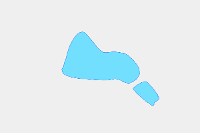

In [7]:
# Load data from arcGIS online
output = arcGIS_data_load('943695bc24e648198e5934b824a1aa65')

ponds = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [8]:
# Merge dataset
data = ponds.merge(observations, left_on='GlobalID', right_on='Ref_to_Ponds', how='inner')

data = data.drop(columns=['GlobalID_x','Ref_to_Ponds'])
data = data.rename(columns={'OBJECTID_x':'Pond_ObjectID','OBJECTID_y':'Record_ObjectID', 'GlobalID_y':'Record_GlobalID'})
    
data.head()

,Pond_ObjectID,Pond,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Start_Time,Stop_Time,Survey_Type,Species_Com,Life_Stage,Snout_to_Vent,Bullfrogs_Euthanized,Euthanization_Method,Comments,Weather_Conditions,Record_GlobalID
0,1,East Pond,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",1,SAC,2017-10-23 23:30:33,Vir McCoy,Mason Holmes,,2017-10-24 00:40:00,2017-10-24 09:30:33,Seining or Dipnet Survey,California tiger salamander,Metamorph Newt/Salamander - Newt/Salamander-newly or nearly having...,2.25,NaN,,,"Sunny, Low 70s to 80s, Clear Skies",d2ac552f-a0a1-4f9f-9ac7-868fad39f589
1,1,East Pond,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",2,SAC,2017-10-23 23:30:33,Vir McCoy,Mason Holmes,,2017-10-24 00:40:00,2017-10-24 09:30:33,Seining or Dipnet Survey,California tiger salamander,Metamorph Newt/Salamander - Newt/Salamander-newly or nearly having...,2.38,NaN,,,"Sunny, Low 70s to 80s, Clear Skies",58795f6b-5206-4912-8fec-553dd521bf83
2,1,East Pond,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",3,SAC,2017-10-23 23:30:33,Vir McCoy,Mason Holmes,,2017-10-24 00:40:00,2017-10-24 09:30:33,Seining or Dipnet Survey,California tiger salamander,Metamorph Newt/Salamander - Newt/Salamander-newly or nearly having...,2.38,NaN,,,"Sunny, Low 70s to 80s, Clear Skies",d828dad1-ff86-46c1-ab2b-bc1542d14814
3,1,East Pond,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",4,SAC,2017-10-23 23:30:33,Vir McCoy,Mason Holmes,,2017-10-24 00:40:00,2017-10-24 09:30:33,Seining or Dipnet Survey,California tiger salamander,Metamorph Newt/Salamander - Newt/Salamander-newly or nearly having...,2.13,NaN,,,"Sunny, Low 70s to 80s, Clear Skies",1b68a82c-39fa-4ee6-a22b-19208483132f
4,1,East Pond,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",5,SAC,2017-10-23 23:30:33,Vir McCoy,Mason Holmes,,2017-10-24 00:40:00,2017-10-24 09:30:33,Seining or Dipnet Survey,California tiger salamander,Metamorph Newt/Salamander - Newt/Salamander-newly or nearly having...,2.25,NaN,,,"Sunny, Low 70s to 80s, Clear Skies",28d7e093-34db-43af-89d8-266a4a69ac77


In [9]:
# Subset data for desired year.
sYear = input("Start Year? (YYYY)")

sub = year_subset(data,sYear)


Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 3


# QAQC

In [5]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(data, objectID=['Record_ObjectID'])



Analysis for: Pond
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Additional_Surveyors
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Survey_Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Com
No \xa0 characters found
No double spaces found
No triple spaces found
No trai

In [10]:
find_blank_entries(data, exclude_cols=['Bullfrogs_Euthanized','Snout_to_Vent'])

No blank Start_Time
No blank Life_Stage
Blank Comments entrie(s) exist!


,Pond_ObjectID,Pond,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Start_Time,Stop_Time,Survey_Type,Species_Com,Life_Stage,Snout_to_Vent,Bullfrogs_Euthanized,Euthanization_Method,Comments,Weather_Conditions,Record_GlobalID
173,2,Lower Courthouse Pond,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",176,None,2021-04-23 18:12:21,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",2021-04-23 18:12:38,2021-04-23 18:35:02,Seining or Dipnet Survey,American bullfrog,Tadpole Frog - Frog-No arms or legs but gills and tail present,4.5,1.0,Mechanical,None,None,8f0433eb-b737-4dd9-886d-9664bbba5926
174,2,Lower Courthouse Pond,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",177,None,2021-04-23 19:35:21,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",2021-04-23 19:12:38,2021-04-23 20:36:02,Seining or Dipnet Survey,American bullfrog,Tadpole Frog - Frog-No arms or legs but gills and tail present,4.0,1.0,Mechanical,None,None,fa3cc2d5-1233-4d64-a7aa-5a817c0c26fc
176,3,Upper Courthouse Pond,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",175,None,2021-03-26 16:05:15,Other,Kurt Lutz,Surveyor 1 Mason Holmes,2021-03-27 04:05:45,2021-03-27 04:37:03,Eyeshine (Nightime),American bullfrog,Adult - 2 or more years old or sexually mature,4.0,0.0,Mechanical,None,None,998c77cc-0207-43db-a6cb-982f0229bbdd


No blank Record_ObjectID
No blank Shape__Length
No blank Record_GlobalID
No blank Species_Com
No blank Surveyor_2
Blank Weather_Conditions entrie(s) exist!


,Pond_ObjectID,Pond,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Start_Time,Stop_Time,Survey_Type,Species_Com,Life_Stage,Snout_to_Vent,Bullfrogs_Euthanized,Euthanization_Method,Comments,Weather_Conditions,Record_GlobalID
173,2,Lower Courthouse Pond,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",176,None,2021-04-23 18:12:21,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",2021-04-23 18:12:38,2021-04-23 18:35:02,Seining or Dipnet Survey,American bullfrog,Tadpole Frog - Frog-No arms or legs but gills and tail present,4.5,1.0,Mechanical,None,None,8f0433eb-b737-4dd9-886d-9664bbba5926
174,2,Lower Courthouse Pond,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",177,None,2021-04-23 19:35:21,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",2021-04-23 19:12:38,2021-04-23 20:36:02,Seining or Dipnet Survey,American bullfrog,Tadpole Frog - Frog-No arms or legs but gills and tail present,4.0,1.0,Mechanical,None,None,fa3cc2d5-1233-4d64-a7aa-5a817c0c26fc
176,3,Upper Courthouse Pond,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",175,None,2021-03-26 16:05:15,Other,Kurt Lutz,Surveyor 1 Mason Holmes,2021-03-27 04:05:45,2021-03-27 04:37:03,Eyeshine (Nightime),American bullfrog,Adult - 2 or more years old or sexually mature,4.0,0.0,Mechanical,None,None,998c77cc-0207-43db-a6cb-982f0229bbdd


No blank Shape__Area
No blank Pond
No blank Additional_Surveyors
No blank Surveyor_1
Blank BHR_Site entrie(s) exist!


,Pond_ObjectID,Pond,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,BHR_Site,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Start_Time,Stop_Time,Survey_Type,Species_Com,Life_Stage,Snout_to_Vent,Bullfrogs_Euthanized,Euthanization_Method,Comments,Weather_Conditions,Record_GlobalID
173,2,Lower Courthouse Pond,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",176,None,2021-04-23 18:12:21,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",2021-04-23 18:12:38,2021-04-23 18:35:02,Seining or Dipnet Survey,American bullfrog,Tadpole Frog - Frog-No arms or legs but gills and tail present,4.5,1.0,Mechanical,None,None,8f0433eb-b737-4dd9-886d-9664bbba5926
174,2,Lower Courthouse Pond,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",177,None,2021-04-23 19:35:21,Other,Kurt Lutz,"Surveyor 1 Mason Holmes. Kevin Sherrill, Silas Ellison, Brian Cree...",2021-04-23 19:12:38,2021-04-23 20:36:02,Seining or Dipnet Survey,American bullfrog,Tadpole Frog - Frog-No arms or legs but gills and tail present,4.0,1.0,Mechanical,None,None,fa3cc2d5-1233-4d64-a7aa-5a817c0c26fc
176,3,Upper Courthouse Pond,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",175,None,2021-03-26 16:05:15,Other,Kurt Lutz,Surveyor 1 Mason Holmes,2021-03-27 04:05:45,2021-03-27 04:37:03,Eyeshine (Nightime),American bullfrog,Adult - 2 or more years old or sexually mature,4.0,0.0,Mechanical,None,None,998c77cc-0207-43db-a6cb-982f0229bbdd


No blank Observation_Date
No blank Euthanization_Method
No blank Pond_ObjectID
No blank Survey_Type
No blank Stop_Time
No blank SHAPE


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


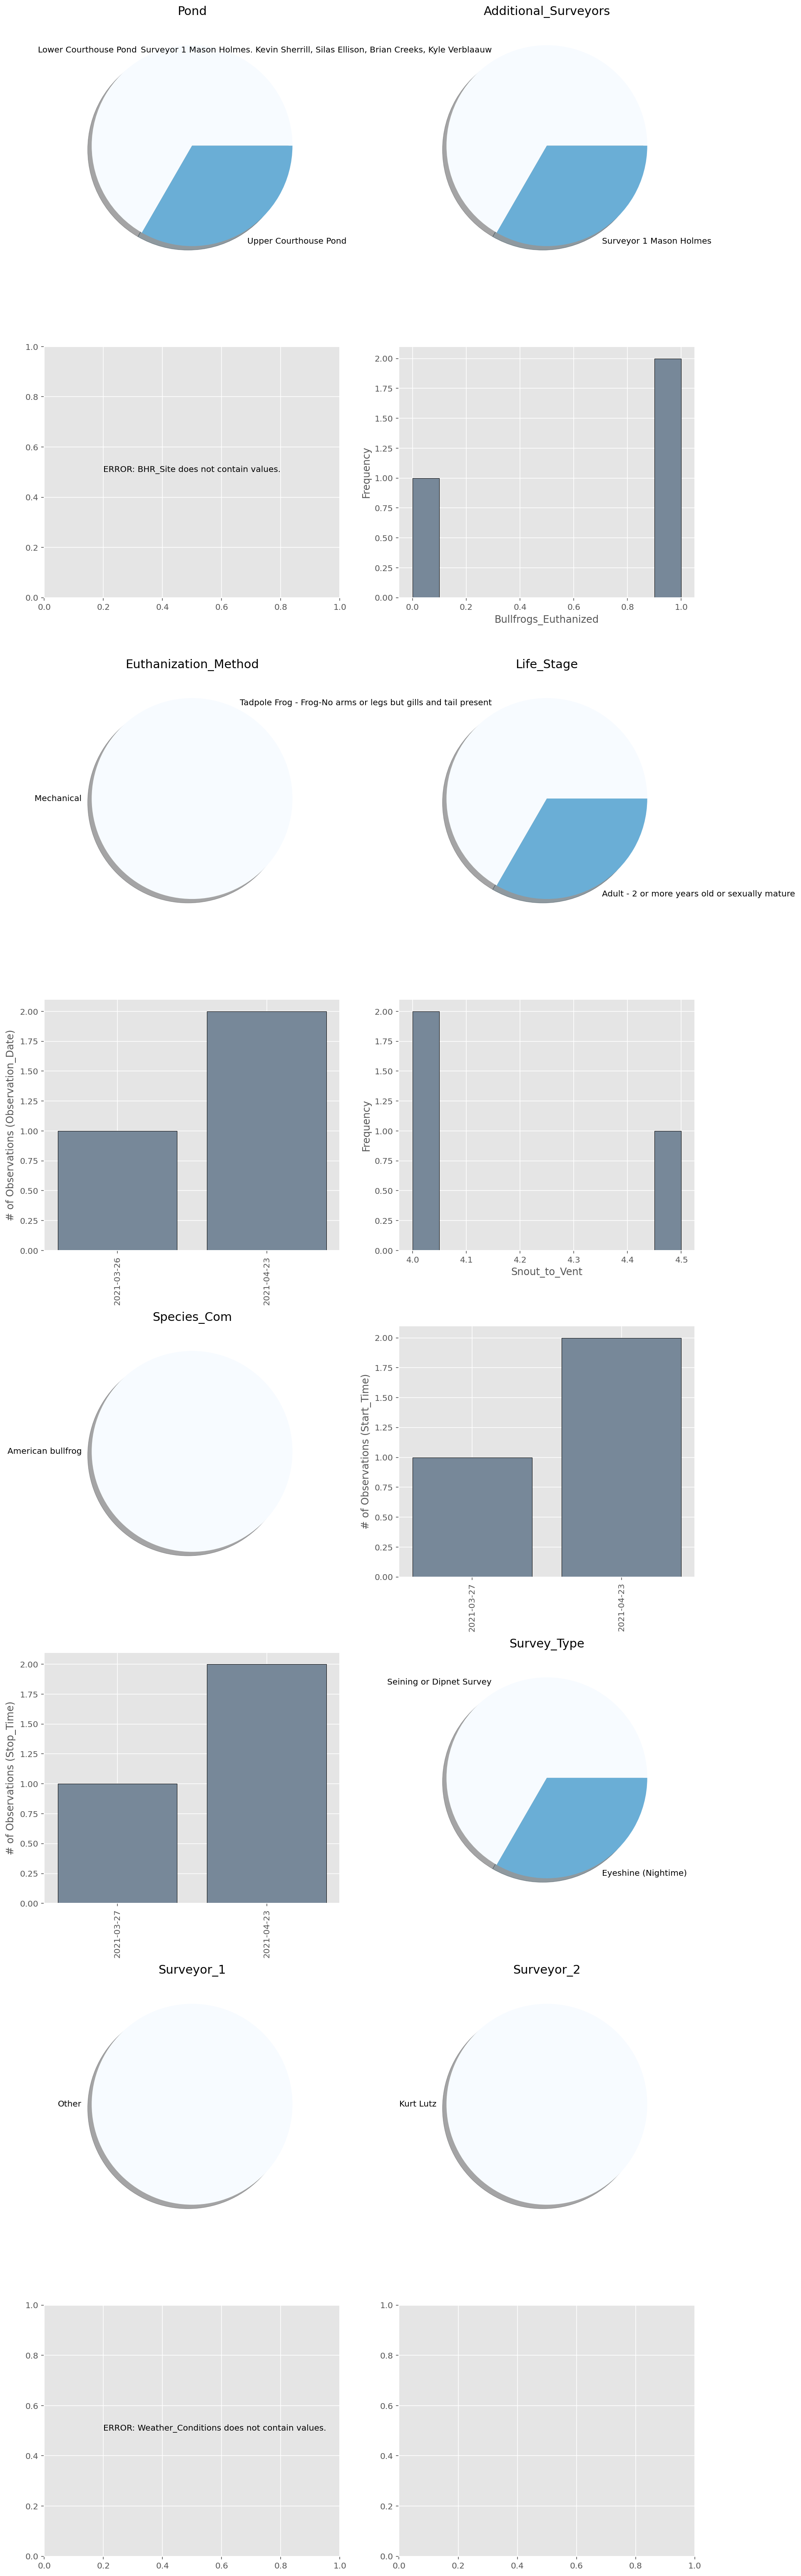

In [11]:
QAQC_plot(sub, ['Pond', 'Additional_Surveyors',
       'BHR_Site', 'Bullfrogs_Euthanized', 'Euthanization_Method',
       'Life_Stage', 'Observation_Date',
       'Snout_to_Vent', 'Species_Com', 'Start_Time', 'Stop_Time',
       'Survey_Type', 'Surveyor_1', 'Surveyor_2', 'Weather_Conditions'])

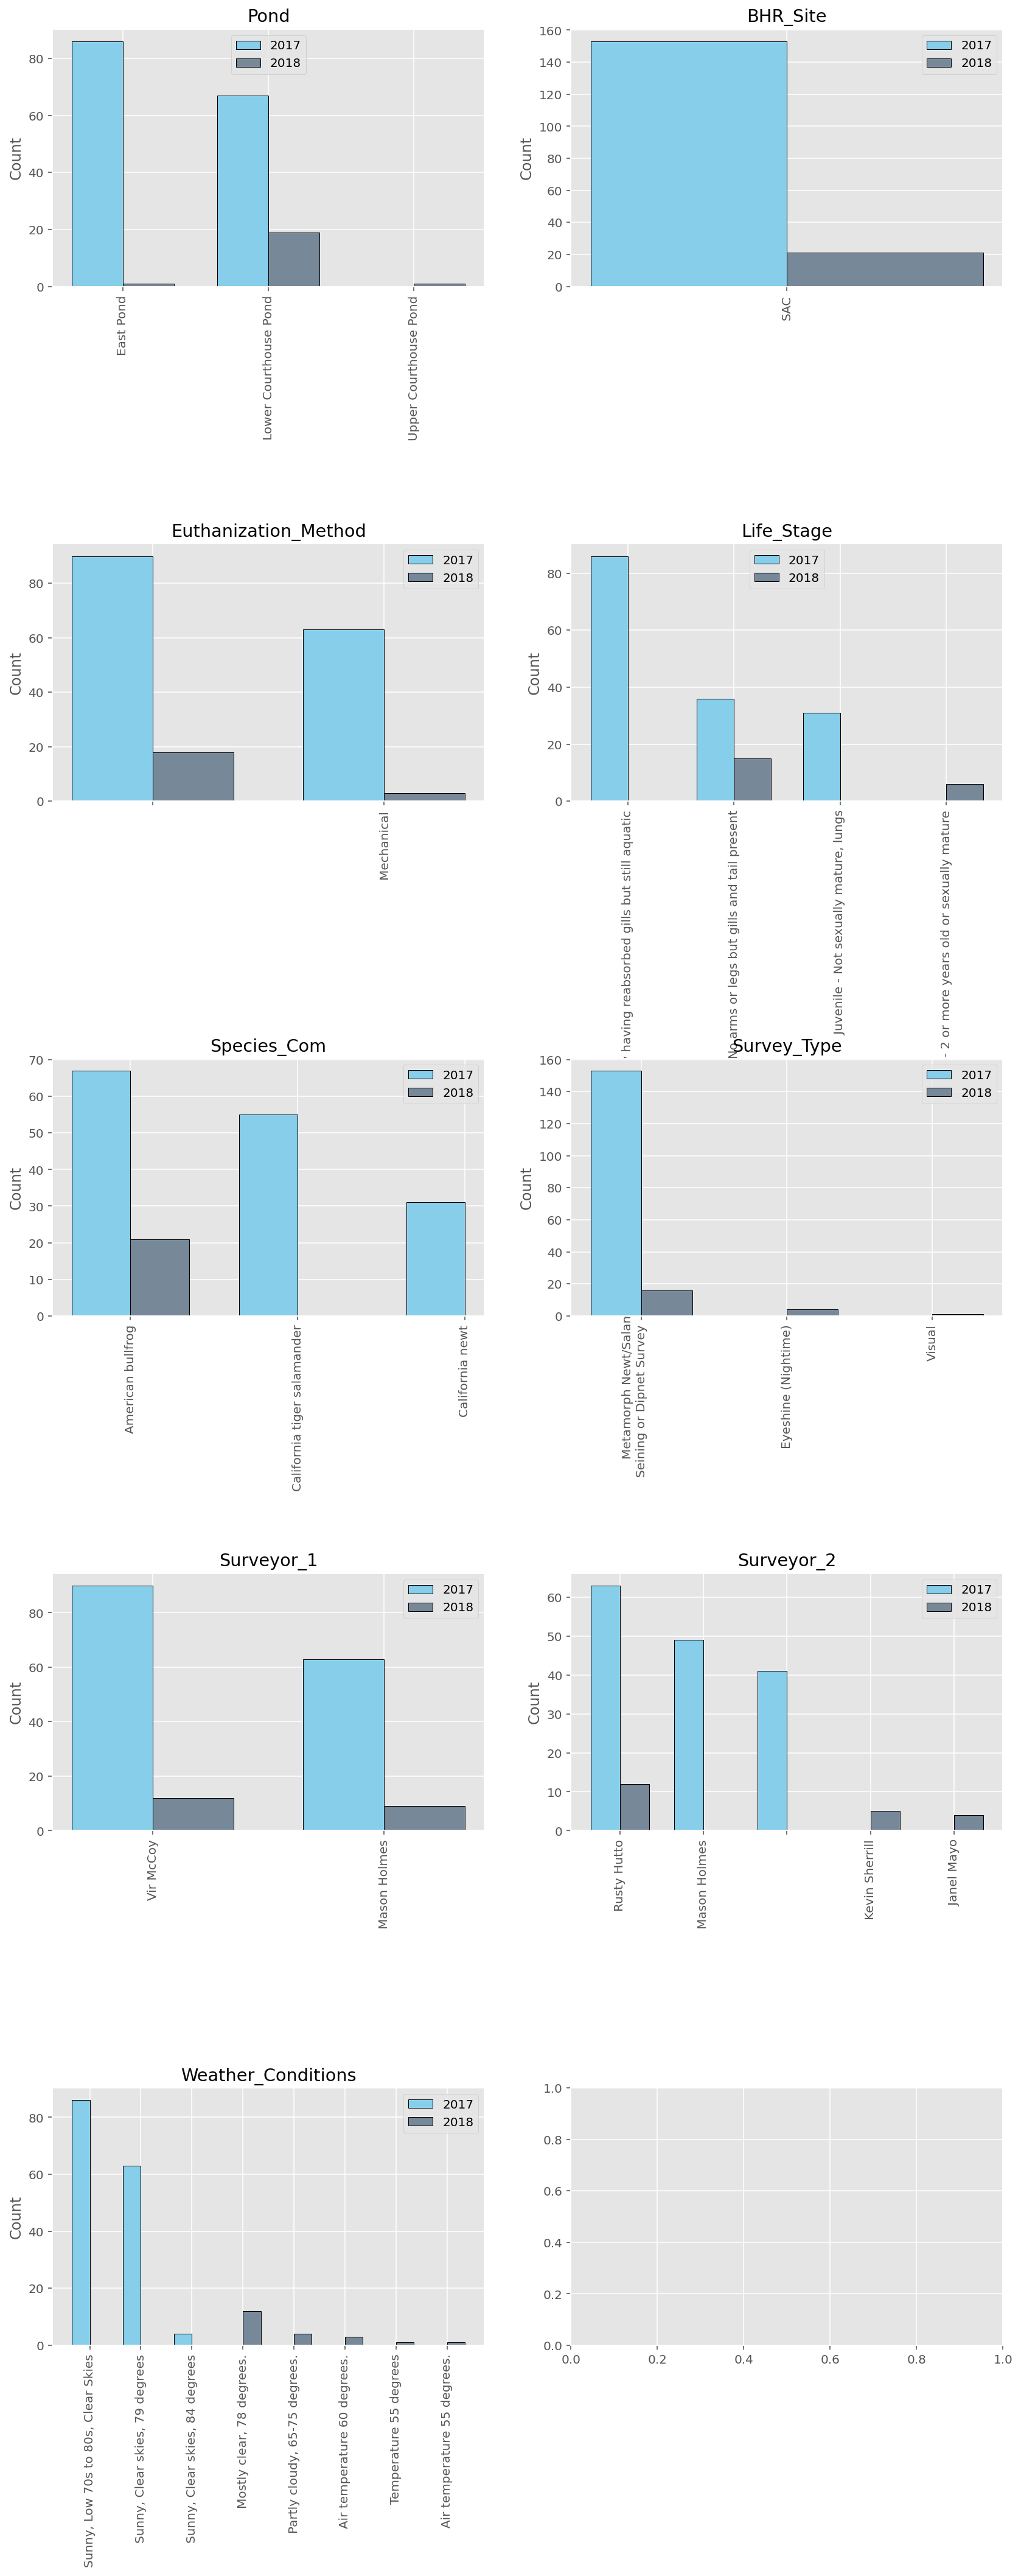

In [12]:
compare_years_catagorical(data,['Pond', 'BHR_Site', 'Euthanization_Method',
       'Life_Stage', 'Species_Com', 'Survey_Type', 'Surveyor_1',
       'Surveyor_2', 'Weather_Conditions'],'2017','2018')


# Export Excel Data Deliverable

In [13]:
data.columns

Index(['Pond_ObjectID', 'Pond', 'Shape__Area', 'Shape__Length', 'SHAPE',
       'Record_ObjectID', 'BHR_Site', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Additional_Surveyors', 'Start_Time', 'Stop_Time',
       'Survey_Type', 'Species_Com', 'Life_Stage', 'Snout_to_Vent',
       'Bullfrogs_Euthanized', 'Euthanization_Method', 'Comments',
       'Weather_Conditions', 'Record_GlobalID'],
      dtype='object')

In [14]:
field_order = ['BHR_Site',
'Observation_Date',
'Start_Time', 
'Stop_Time',
'Surveyor_1',
'Surveyor_2',
'Additional_Surveyors',
'Pond', 
'Species_Com', 
'Survey_Type',
'Weather_Conditions',
'Life_Stage',
'Snout_to_Vent',
'Bullfrogs_Euthanized',
'Euthanization_Method',
'Comments', 
'Pond_ObjectID',
'Record_ObjectID',
'Record_GlobalID', 
'SHAPE',
'Shape__Area', 
'Shape__Length']

In [15]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Predator_Monitoring')

Exported to Outputs/SAC_Predator_Monitoring_Data_20211216.xlsx
